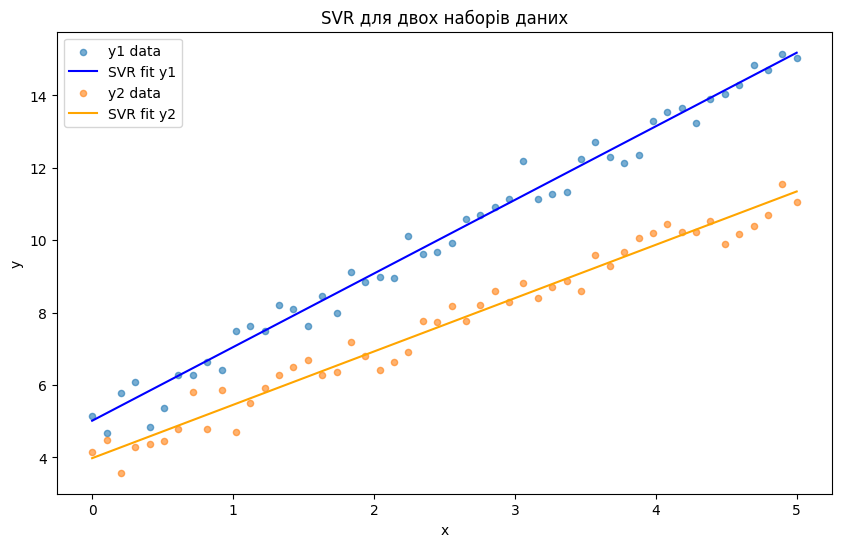

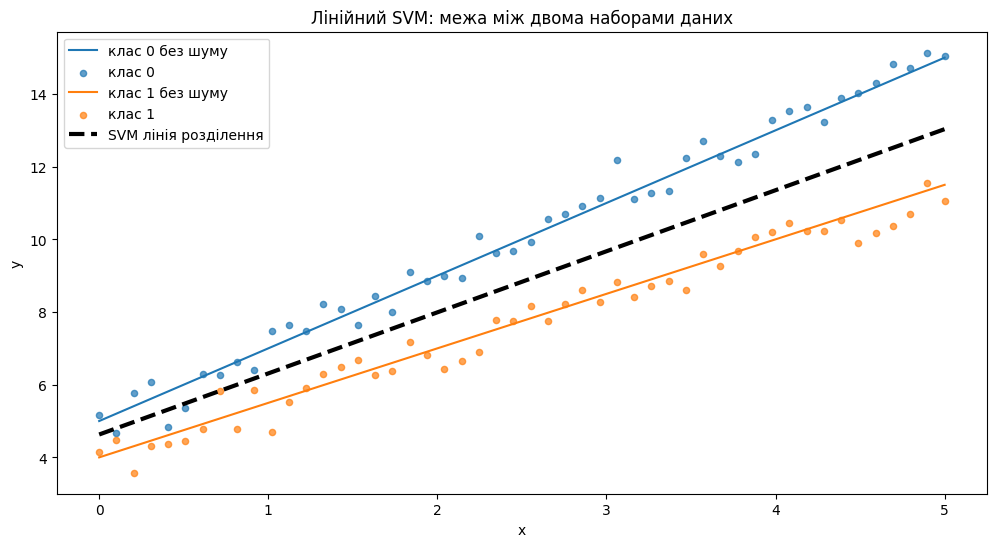

Лінія розділення (оригінальні координати): y = 1.681*x + 4.630


In [7]:
# Імпортуємо необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, SVC

# -----------------------------
# Генеруємо синтетичні дані
# -----------------------------
N = 50
x = np.linspace(0, 5, N)

# Лінійні дані з шумом для двох класів / цільових змінних
y1base = 2*x + 5                  # клас 0 без шуму
y2base = 1.5*x + 4                # клас 1 без шуму

rng = np.random.default_rng(42)
y1 = y1base + rng.normal(scale=0.5, size=N)
y2 = y2base + rng.normal(scale=0.5, size=N)

# -----------------------------
# SVR: регресія для кожного набору
# -----------------------------
X = x.reshape(-1, 1)

# Створюємо пайплайни: масштабування -> SVR
svr1 = make_pipeline(StandardScaler(), SVR(kernel="linear", C=100.0, epsilon=0.1))
svr2 = make_pipeline(StandardScaler(), SVR(kernel="linear", C=100.0, epsilon=0.1))

# Навчання моделей
svr1.fit(X, y1)
svr2.fit(X, y2)

# Передбачення на плавній кривій
x_fit = np.linspace(0, 5, 400).reshape(-1, 1)
y1_hat = svr1.predict(x_fit)
y2_hat = svr2.predict(x_fit)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, s=20, alpha=0.6, label="y1 data")
plt.plot(x_fit, y1_hat, label="SVR fit y1", color="blue")
plt.scatter(x, y2, s=20, alpha=0.6, label="y2 data")
plt.plot(x_fit, y2_hat, label="SVR fit y2", color="orange")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("SVR для двох наборів даних")
plt.show()

# -----------------------------
# Лінійний SVM для класифікації двох наборів
# -----------------------------
# Комбінується два набори даних з мітками класів
X_cls = np.vstack([
    np.column_stack([x, y1]),  # клас 0
    np.column_stack([x, y2])   # клас 1
])
y_cls = np.hstack([np.zeros(N, dtype=int), np.ones(N, dtype=int)])

# Створюємо пайплайн SVM
clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", C=1.0, random_state=0)
)

# Навчаємо класифікатор
clf.fit(X_cls, y_cls)

# Отримуємо коефіцієнти для межі рішень в оригінальному масштабі
svm = clf.named_steps["svc"]
scaler = clf.named_steps["standardscaler"]

w = svm.coef_[0]
b = svm.intercept_[0]
mux, muy = scaler.mean_
sx, sy = scaler.scale_

# Обчислюємо y межі рішень
xx = np.linspace(0, 5, 400)
if abs(w[1]) < 1e-12:
    yy = np.full_like(xx, np.nan)  # вертикальна лінія
else:
    yy = muy - (sy / w[1]) * (w[0] * (xx - mux) / sx + b)

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(x, y1base, label="клас 0 без шуму")
plt.scatter(x, y1, s=20, alpha=0.7, label="клас 0")
plt.plot(x, y2base, label="клас 1 без шуму")
plt.scatter(x, y2, s=20, alpha=0.7, label="клас 1")
plt.plot(xx, yy, "k--", lw=3, label="SVM лінія розділення")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Лінійний SVM: межа між двома наборами даних")
plt.legend()
plt.show()

# Вивід рівняння лінії розділення
if abs(w[1]) >= 1e-12:
    m = - (sy / w[1]) * (w[0] / sx)
    c = muy - (sy / w[1]) * b + (sy / w[1]) * (w[0]*mux / sx)
    print(f"Лінія розділення (оригінальні координати): y = {m:.3f}*x + {c:.3f}")
